# Homework 8.7 - Coding

This is the coding portion of the homework assignment for Section 8.7

In [26]:
from typing import Callable
import numpy as np
from matplotlib import pyplot as plt

## Problem 8.33

Implement the function `compute_exp_fourier_coeffs()`, which computes the coefficients of the exponential Fourier series of a function $f: [0, T] \to \mathbb{R}$ with Nyquist frequency $\nu$. This should be done using the periodic sampling theorem algorithm.

Your code should accept the following as arguments:

1. `v` - An integer representing the Nyquist frequency
2. `n` - An integer, representing the number of samples to use (should be greater than `2 * v`)
3. `T` - A floating point number, representing the right endpoint of the domain $[0, T]$
4. `f` - A function handle, for a function $f : [0, T] \to \mathbb{R}$ (which should accept a numpy array, and return an equally-sized numpy array representing the function applied to each input individually). This is the function to sample.

Your code should return:

1. A numpy array of length $2\nu + 1$, which contains the fourier coefficients $[c_{-\nu}, \ldots, c_0, \ldots, c_{\nu}]$ (in that order).
2. A numpy array of shape `(n,2)` which contains the $n$ generated samples $ \{(t_0, f(t_0)), ... (t_{n-1}, f(t_{n-1}))\}$ used to produce these coefficients.

   These `n` samples you create from `f` should be equally-spaced, and should **not** include the right endpoint `T`.

In [27]:
def compute_exp_fourier_coeffs(
    v: int,
    n: int,
    T: float, 
    f: Callable[[np.ndarray], np.ndarray]
) -> tuple[np.ndarray, np.ndarray]:
    """Computes the coefficients of the exponential Fourier series of f:[0,T] -> R.
    
    Uses n equally-spaced samples {(t_0, f(t_0)), ... (t_{n-1}, f(t_{n-1}))} 
    (where n > 2v, and v is the Nyquist frequency)
    to perform this action.

    This is performed using the periodic sampling theorem algorithm.

    Args:
        v (int) - The Nyquist frequency
        n (int) - The number of samples to use (should be greater than 2v)
        T (float) - The endpoint of the domain interval [0, T] for the 
            input function f 
        f (callable) - A function f:[0, T] -> R which takes in a numpy array x, 
            and returns an equally-sized numpy array, whose elementsa are the function f(x)
            applied to each input array element x individually
    
    Returns:
        np.ndarray - A size 2v + 1 array of the exponential Fourier coefficients
            [c_{-v}, ..., c_0, ..., c_v]
        np.ndarray - A size (n,2) array of the generated samples 
            {(t_0, f(t_0)), ... (t_{n-1}, f(t_{n-1}))} (where the right 
            endpoint T is excluded as a sample point).
    """
    

    t = np.linspace(0, T, n, endpoint=False)
    samples = f(t)

    # transform
    f_hat_arr = np.fft.fft(samples)

    # rescale
    f_hat_arr = f_hat_arr / n


    # prep c_k arr
    c = np.zeros(2*v + 1, dtype = complex)

    # Fill positive and zero frequencies: k = 0,...,v
    for i, k in enumerate(range(-v, v+1)):
        if k >= 0:
            c[i] = f_hat_arr[k]
        else:
            # negative k corresponds to f_hat[k+n]
            c[i] = f_hat_arr[k + n]

    # Return coefficients and sample points
    return c, np.column_stack((t, samples))





Now, write a function `exp_fourier` which returns the exponential fourier series of a function
$$g(t) = \sum_{k = -\nu}^{\nu} c_k e^{i \omega k t}$$
as a callable function.

Your code should accept as arguments:

1. `v` - An integer representing the Nyquist frequency
2. `n` - An integer, representing the number of samples to use (should be greater than `2 * v`)
3. `T` - A floating point number, representing the right endpoint of the domain $[0, T]$
4. `f` - A function handle, for a function $f : [0, T] \to \mathbb{R}$ (which should accept a numpy array, and return an equally-sized numpy array representing the function applied to each input individually)

Your code should return:

1. A callable function `g`, which accepts a numpy array `t` as an input argument, and outputs a similarly-sized input array $g$(`t`) (where $g$ is exaactly the fourier series described above).
   
   You should call `compute_exp_fourier_coeffs` to help construct this callable function.
   
2. A numpy array of shape `(n,2)` which contains the $n$ generated samples $ \{(t_0, f(t_0)), ... (t_{n-1}, f(t_{n-1}))\}$ used to produce these coefficients.

   These `n` samples you create from `f` should be equally-spaced, and should **not** include the right endpoint `T`.




In [28]:
def exp_fourier(
    v: int,
    n: int,
    T: float, 
    f: Callable[[np.ndarray], np.ndarray]
) -> tuple[Callable[[np.ndarray], np.ndarray], np.ndarray]:
    """Returns exponential Fourier series of f:[0,T] -> R as a callable function

    Args:
        v (int) - The Nyquist frequency
        n (int) - The number of samples to use (should be greater than 2v)
        T (float) - The endpoint of the domain interval [0, T] for the 
            input function f 
        f (Callable) - A function f:[0, T] -> R which takes in a numpy array x, 
            and returns an equally-sized numpy array, whose elementsa are the function f(x)
            applied to each input array element x individually
    
    Returns:
        Callable - A callable function for the exponential fourier series g(t) of f
        np.ndarray - A size (n,2) array of the generated samples 
            {(t_0, f(t_0)), ... (t_{n-1}, f(t_{n-1}))} (where the right 
            endpoint T is excluded as a sample point).
    """
    
    c, coords = compute_exp_fourier_coeffs(v, n, T, f)
    def g(t):
        k = np.arange(-v, v + 1)[:, None]  # shape (2v+1, 1)
        c_col = c[:, None]           # shape (2v+1, 1)
        omega = 2*np.pi / T
        exponent = 1j * omega * k * t # I hope that k and t multiply correctly
        summands = c_col * np.exp(exponent)
        return np.real(np.sum(summands, axis=0))

    return g, coords

---

## Problem 8.34 

First, in the following Markdown cell, write the period $T$ and the Nyquist frequency $\nu$ of the following function:

$$f(x) = 1 - 3\sin(12\pi x + 7) + 5 \sin(2\pi x - 1) + 5 \sin(4\pi x - 3)$$

(You should have found this as part of the corresponding written assignment. Show your work there, and write your response here).

* **Period $T$**: _1_

* **Nyquist Frequency $\nu$**: _6_

Now, in the following code cell, for each value of $n \in \{3, 7, 11, 13\}$:

1. Use your code from the previous problem to:
   
   (a)  Sample this function $f$ at the $n$ equally-spaced points $t_0, \ldots, t_{n-1}$ with $t_\ell = \frac{\ell T}{n}$, then
   
   (b) Find the unique function $g_n(x)$ with Nyquist frequency less than $n/2$ passing through those $n$ points.

2. Plot $f$, $g_n$, and the $n$ sample points on the same graph. Make sure to label your plot, title it, etc., and then display it to the screen.

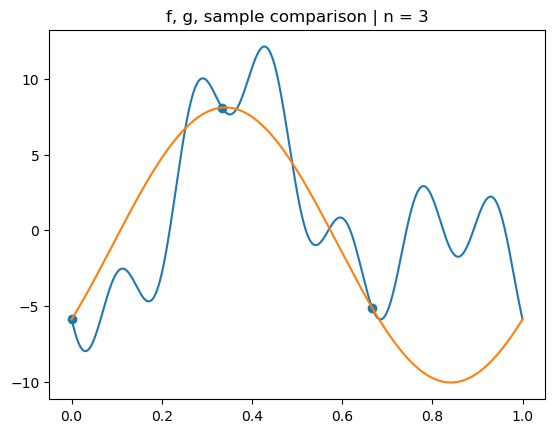

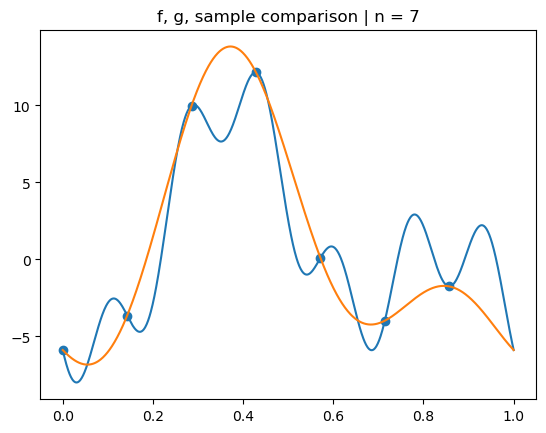

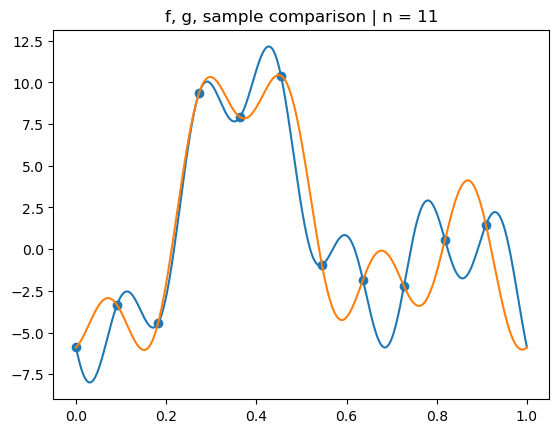

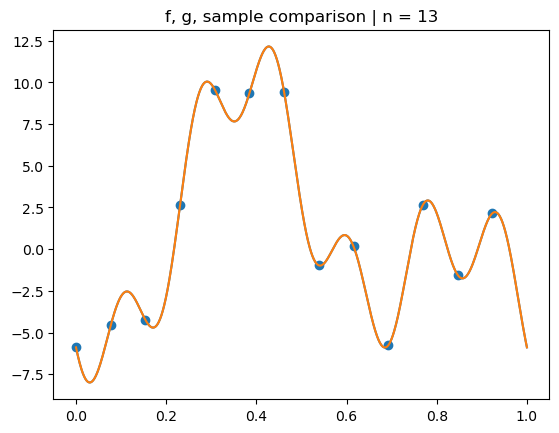

In [29]:
def f(x):
    return (
        1
        - 3 * np.sin(12 * np.pi * x + 7)
        + 5 * np.sin(2 * np.pi * x - 1)
        + 5 * np.sin(4 * np.pi * x - 3)
    )

T = 1

N = 1000

for n in [3, 7, 11, 13]:
    samples = np.linspace(0, T, n, endpoint=False)
    g, coords = exp_fourier(n // 2, n, T, f)

    graphing_points = np.linspace(0, T, N)
    
    plt.figure()
    plt.plot(graphing_points, f(graphing_points), label="f(x)")
    plt.plot(graphing_points, g(graphing_points), label="g(x)")
    plt.scatter(coords[:,0], coords[:,1], label="Sample Points")
    plt.title(f"f, g, sample comparison | n = {n}")
    plt.show()

---

IMPORTANT: Please "Restart and Run All" and ensure there are no errors. Then, submit this .ipynb file to Gradescope.